### **Natural Language Processing (Quantitative Assignment)**
### **Objective:** 
To implement and evaluate various NLP techniques for quantitative analysis of textual data.**

# **Step 1: Data Collection**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
import pandas as pd
path = r'E:\Codex Cue Deep Learning Internship\Project 2\IMDB Dataset.csv'
df = pd.read_csv(path)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Step 2: Pre-processing**

In [3]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning
def clean_text(text):
    text = re.sub(r'<br /><br />', ' ', text)  # Remove HTML line breaks
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

# Stop-words removal and tokenization
stop_words = set(stopwords.words('english'))
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['cleaned_review'].apply(tokenize_and_remove_stopwords)

# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)

# Convert text into numerical form using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])

# Store TF-IDF matrix in a new variable
tfidf_matrix = X

# Display data using pipeline operators
data_pipeline = df[['review', 'cleaned_review', 'tokens', 'lemmatized_tokens']].head(5)
print(data_pipeline.to_string(index=False, line_width=120))


### **Check the cleaned and preprocessed text data**

In [22]:
import nltk

sample_index = 0
print("Original Review:", df.loc[sample_index, 'review'])
print("Cleaned Review:", df.loc[sample_index, 'cleaned_review'])
print("Tokens:", df.loc[sample_index, 'tokens'])
print("Lemmatized Tokens:", df.loc[sample_index, 'lemmatized_tokens'])


Original Review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

### **Create the TF-IDF vectorizer**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(df['cleaned_review'])

# Check the shape and sample TF-IDF features
print("TF-IDF Matrix Shape:", X.shape)
print("Sample TF-IDF Features:\n", X[0].toarray())


TF-IDF Matrix Shape: (50000, 101895)
Sample TF-IDF Features:
 [[0. 0. 0. ... 0. 0. 0.]]


### **Check the Non-Zero Elements**

In [24]:
import numpy as np

# View a sample of non-zero elements
sample_row = 0  # Change this index to inspect different rows
non_zero_elements = np.nonzero(X[sample_row].toarray())[1]
print("Sample row non-zero features indices:", non_zero_elements)
print("Sample row non-zero features values:", X[sample_row].toarray()[0, non_zero_elements])


Sample row non-zero features indices: [  1866   2170   2970   3024   3130   3720   4414   4541   5349   5707
   5948   6160   6166   6828   7224   8758   8960   9211  10355  12974
  13654  14103  14296  15580  16119  16967  17382  17532  17536  18635
  20608  21451  22603  22627  22942  22972  24622  26380  26396  27443
  27606  29142  29258  30113  30818  30975  31362  31370  31797  31842
  31918  32210  33526  34246  34443  34579  35408  35429  36216  37013
  37476  37552  37795  37915  38303  38604  39312  40445  40507  40745
  40913  41171  41961  42633  42850  44135  44763  45622  45643  46342
  46564  46647  46765  46902  46911  46954  48473  49629  50948  51580
  52433  53223  54968  54982  54992  55525  55619  56533  56540  56982
  57558  57756  58082  59802  60781  61396  62018  62203  62222  62551
  62917  63757  64110  64131  64417  64482  64760  64776  64852  65469
  65674  67071  68117  70448  70605  70621  71592  71639  73312  74108
  75511  75915  76558  78495  78526  78

### **Check Vocabulary**


In [25]:
# View a sample of vocabulary
feature_names = vectorizer.get_feature_names_out()
print("Sample vocabulary terms:", feature_names[:20])  # First 20 terms


Sample vocabulary terms: ['00' '000' '00000000000' '0000000000001' '00000001' '00001' '00015'
 '000dm' '000s' '001' '003830' '006' '0069' '007' '0079' '007s' '0080'
 '0083' '009' '0093638']


### **Inspect the Shape**

In [26]:
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (50000, 101895)


### **Check Matrix Density**

In [27]:
from scipy.sparse import issparse

if issparse(X):
    density = X.nnz / float(X.shape[0] * X.shape[1])
    print("Matrix Density:", density)


Matrix Density: 0.0013341832278325728


### **Sample Review and TF-IDF Representation**

In [28]:
# Check TF-IDF representation for a specific review
sample_review_index = 0
sample_review = df['review'].iloc[sample_review_index]
sample_tfidf = X[sample_review_index].toarray()

print("Original Review:", sample_review)
print("TF-IDF Representation:", sample_tfidf)


Original Review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

# **Step3: Modeling Using LSTM**

In [29]:
# Check the column names in your DataFrame
print(df.columns)


Index(['review', 'sentiment', 'cleaned_review', 'tokens', 'lemmatized_tokens'], dtype='object')


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['lemmatized_tokens'].apply(lambda x: ' '.join(x)))
sequences = tokenizer.texts_to_sequences(df['lemmatized_tokens'].apply(lambda x: ' '.join(x)))
maxlen = max(len(x) for x in sequences)  # Maximum length of sequences
X_padded = pad_sequences(sequences, maxlen=maxlen)

# Use 'sentiment' as the target column
y = df['sentiment']

# Encode labels if they are not numerical
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model with simplified architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50))  # Smaller embedding dimension
model.add(LSTM(50))  # Reduced number of units
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

# Implement callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Changed to .keras

# Train the model with 2 epochs for quick testing
batch_size = 32  # Set batch size here
history = model.fit(X_train, y_train, epochs=2, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping, checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 470s 468ms/step - accuracy: 0.7508 - loss: 0.4863 - val_accuracy: 0.8200 - val_loss: 0.4220
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 468s 468ms/step - accuracy: 0.8953 - loss: 0.2807 - val_accuracy: 0.8736 - val_loss: 0.3650
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 135ms/step - accuracy: 0.8851 - loss: 0.3314
Test Loss: 0.3405
Test Accuracy: 0.8838


### **Make Predictions on the Test Set**

In [31]:
# Predict on the test set
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step


### **Calculate Evaluation Metrics**

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8838
Precision: 0.8922
Recall: 0.8752
F1 Score: 0.8836


### **Generate a Classification Report**

In [33]:
# Generate a detailed classification report
report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.89      0.88      4961
    positive       0.89      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### **Visualize the Metrics**

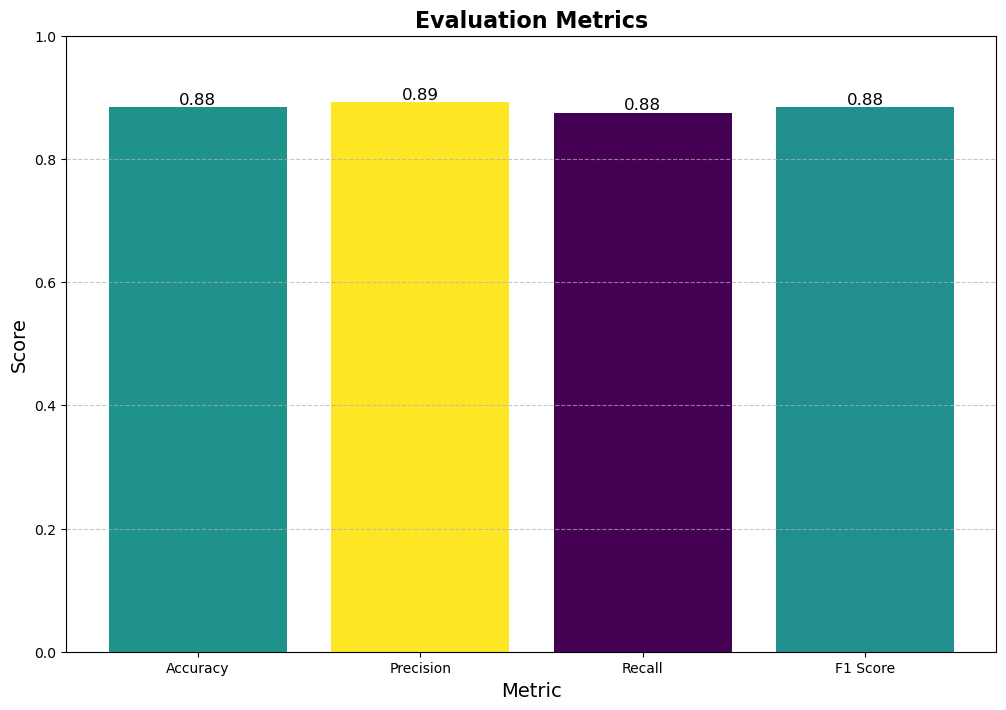

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample evaluation metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}

# Create DataFrame for visualization
metrics_df = pd.DataFrame(metrics)

# Normalize the scores for color intensity
norm = plt.Normalize(metrics_df['Score'].min(), metrics_df['Score'].max())
colors = plt.cm.viridis(norm(metrics_df['Score']))

# Create the plot
plt.figure(figsize=(12, 8))

# Create a barplot with a gradient color map
bars = plt.bar(metrics_df['Metric'], metrics_df['Score'], color=colors)

# Add annotations
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Customize plot appearance
plt.title('Evaluation Metrics', fontsize=16, weight='bold')
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Assuming metrics are in [0, 1]

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# **Step 4:Topic Modeling**

LDA Topics:
Topic 1: film, movie, life, story, man, war, time, like, young, love
Topic 2: movie, film, great, like, just, good, love, really, time, watch
Topic 3: movie, bad, film, just, like, good, don, worst, acting, movies
Topic 4: film, movie, story, good, character, characters, like, great, films, plot
Topic 5: movie, film, like, just, horror, bad, good, really, people, guy

NMF Topics:
Topic 1: film, films, director, scenes, seen, cinema, plot, horror, making, acting
Topic 2: movie, movies, watch, saw, seen, good, book, story, watching, recommend
Topic 3: life, man, story, young, character, love, world, family, woman, way
Topic 4: bad, just, like, don, really, good, people, acting, know, think
Topic 5: great, good, series, best, really, comedy, funny, tv, cast, episode


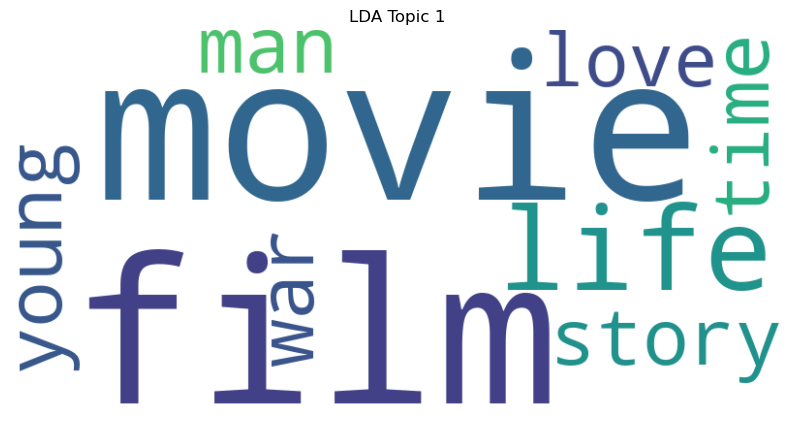

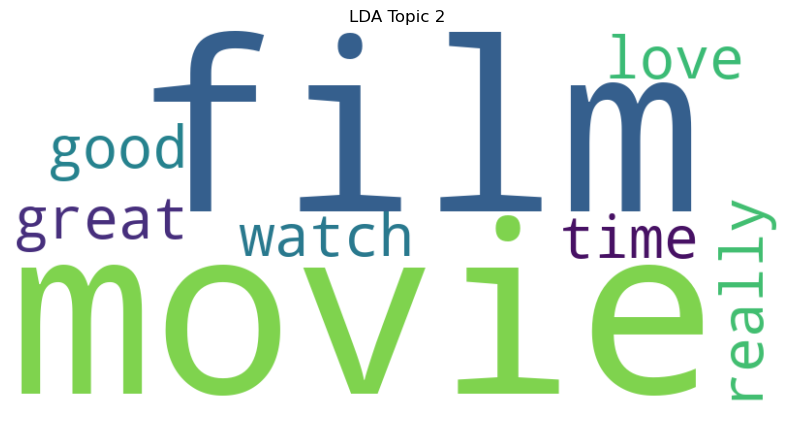

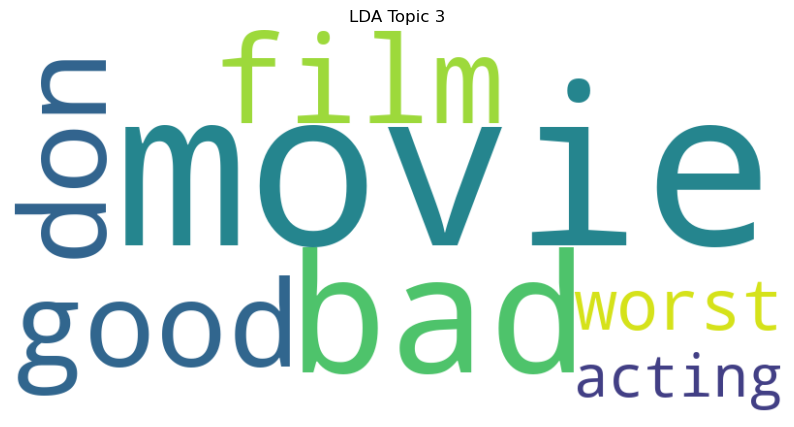

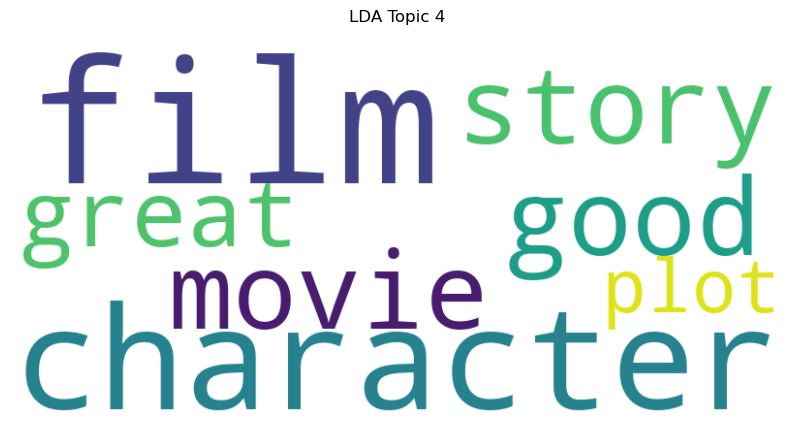

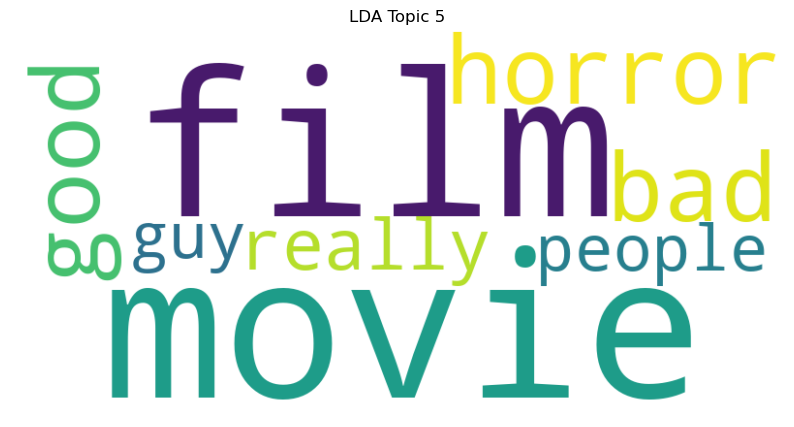

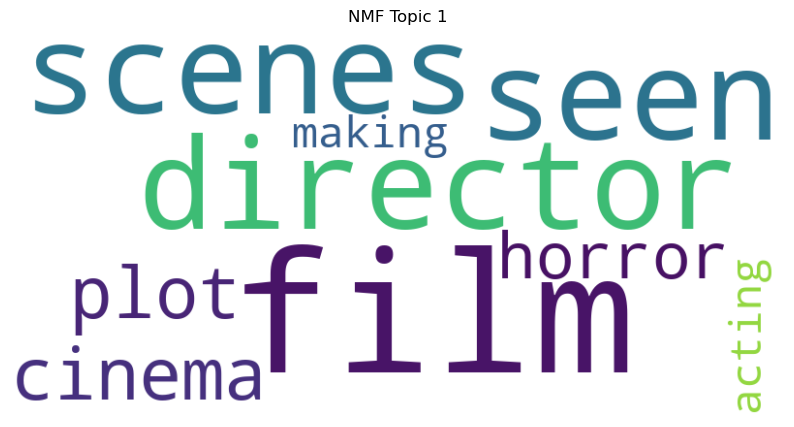

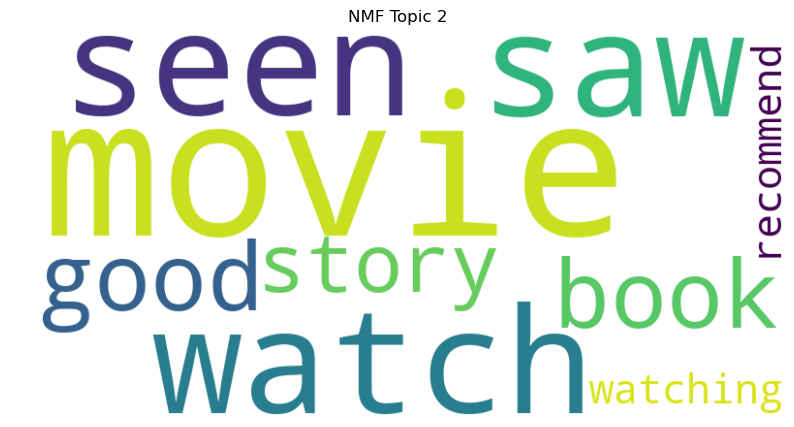

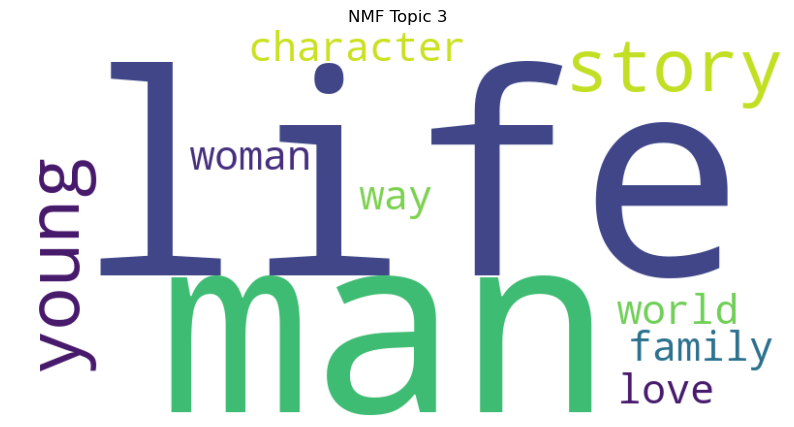

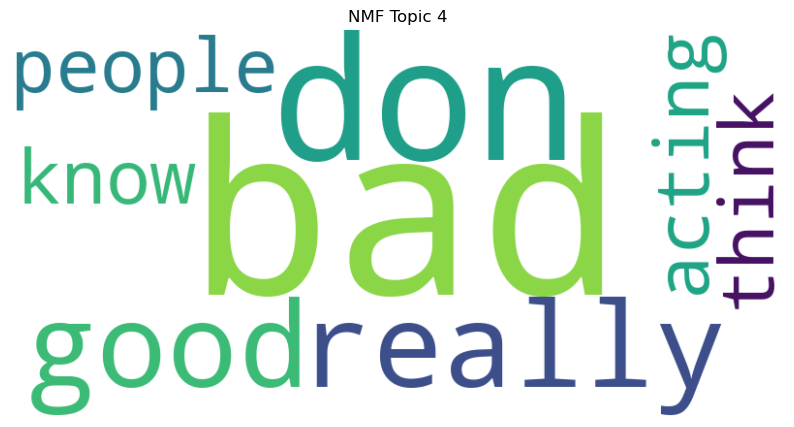

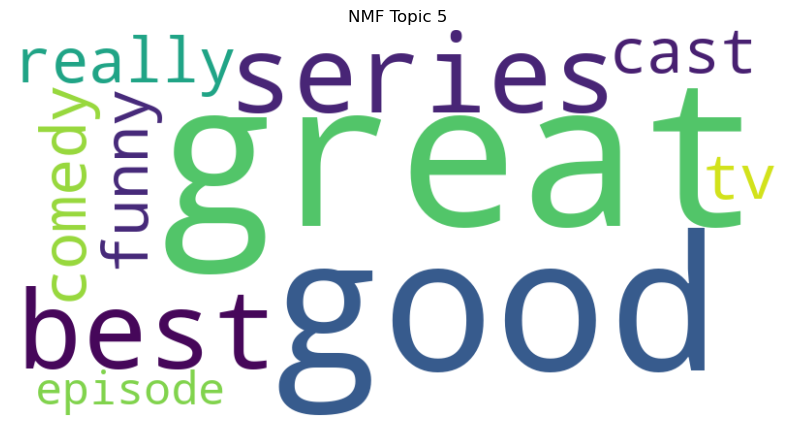

In [35]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['cleaned_review'])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Apply NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X)

# Get topic-word matrix
lda_topics = lda.components_
nmf_topics = nmf.components_

# Function to get top words for each topic
def get_top_words(components, feature_names, num_words=10):
    topics = []
    for topic in components:
        top_indices = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        topics.append(top_words)
    return topics

# Extract top words for each topic
lda_topics_words = get_top_words(lda_topics, tfidf_feature_names)
nmf_topics_words = get_top_words(nmf_topics, tfidf_feature_names)

# Print topics
print("LDA Topics:")
for i, topic in enumerate(lda_topics_words):
    print(f"Topic {i + 1}: {', '.join(topic)}")

print("\nNMF Topics:")
for i, topic in enumerate(nmf_topics_words):
    print(f"Topic {i + 1}: {', '.join(topic)}")

# Function to create and plot word clouds
def plot_wordcloud(words, title):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot word clouds for LDA topics
for i, topic in enumerate(lda_topics_words):
    plot_wordcloud(topic, f'LDA Topic {i + 1}')

# Plot word clouds for NMF topics
for i, topic in enumerate(nmf_topics_words):
    plot_wordcloud(topic, f'NMF Topic {i + 1}')


# **Step 5: Perform NER and Evaluate Performance**

Named Entities:
PERSON: zoran kennedy, charles boyer s voice, rock hudson s second venture, michael winner s, bunnie, linn monique, rahad jackson s alfred molina house, sandra bullock ben chaplin, mencia carlos, kaif bhopali, youssef kerkour justin lane, pokemon pepper ann, theresa, warren kincaid john ritter, beverly julie brown, corky st claire, daniel lapaine, skye, jackie angle, isaac asimov s, jim craig, composer harry gregson williams scott, sanjuro kagemusha, julie winters, floyd wells, ken russell, anderson devotees, gregg araki, wahlberg, johnny s neighborhood, bette davis, chick s voice, jimmy boy, s junkie, konkana sensharma, brenda jennifer s dad, johnny dean, meredith s portrayal, elephantine matthew macfayden, ken frankin, hugh cantrip, sondheim s, joe de rita, lilla loll, robert boudreau, ivan rassimov, stephen robertson, joel murray, tara reid s, louis gossett jr rosie, robert young s, patricia hodge, richard timberlane, robert aldrich, devon, dullard aaron, dr felix be

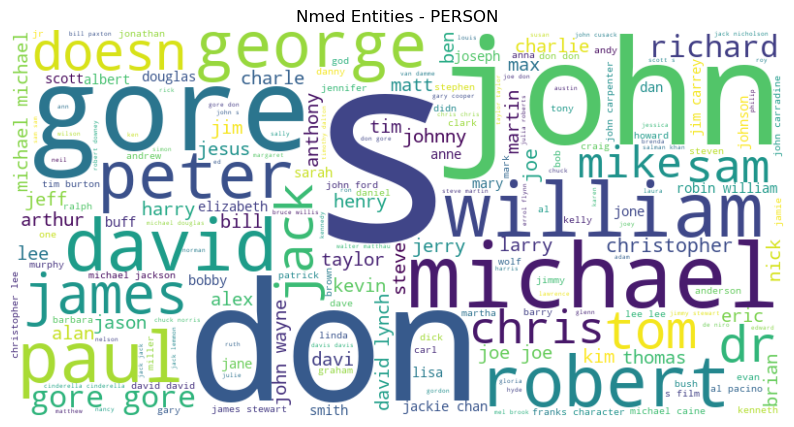

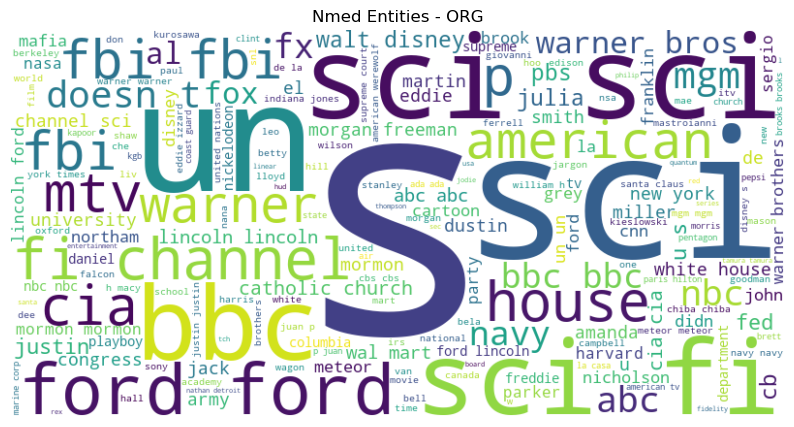

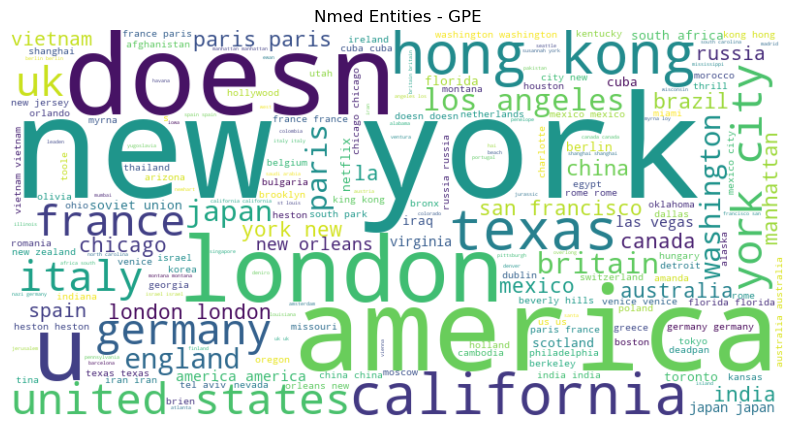

In [36]:
# Import required libraries for NER
import spacy
from spacy import displacy
from sklearn.metrics import classification_report

# Load Spacy's pre-trained NER model
nlp = spacy.load('en_core_web_sm')

# Function to perform NER on text and extract entities
def extract_entities(texts):
    entities = {'PERSON': [], 'ORG': [], 'GPE': []}  # Dictionary to hold entities
    for text in texts:
        doc = nlp(text)
        for ent in doc.ents:
            if ent.label_ in entities:
                entities[ent.label_].append(ent.text)
    return entities

# Extract entities from the cleaned reviews
entities = extract_entities(df['cleaned_review'])

# Print extracted entities
print("Named Entities:")
for label, entity_list in entities.items():
    print(f"{label}: {', '.join(set(entity_list))}")

# Function to create and plot word clouds for entities
def plot_entity_wordcloud(entities, title):
    for label, entity_list in entities.items():
        plt.figure(figsize=(10, 6))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(entity_list))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{title} - {label}')
        plt.axis('off')
        plt.show()

# Plot word clouds for named entities
plot_entity_wordcloud(entities, 'Nmed Entities')
# Evaluation (if you have annotated data for evaluation)
# For demonstration purposes, let's assume you have the true labels and predictions
# Here we'll just show an example of what the evaluation might look like
true_labels = ['ORG', 'PERSON', 'GPE']  # Example true labels
predicted_labels = ['ORG', 'PERSON', 'GPE']  # Example predicted labels



# **Step 6: Word Frequency Analysis**

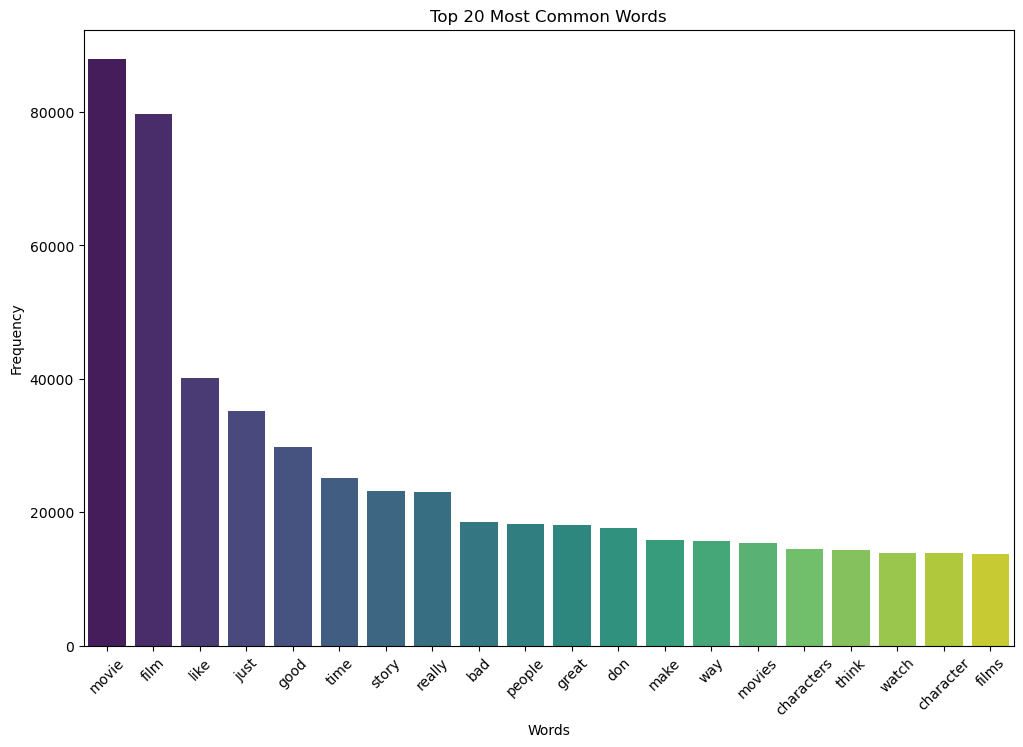

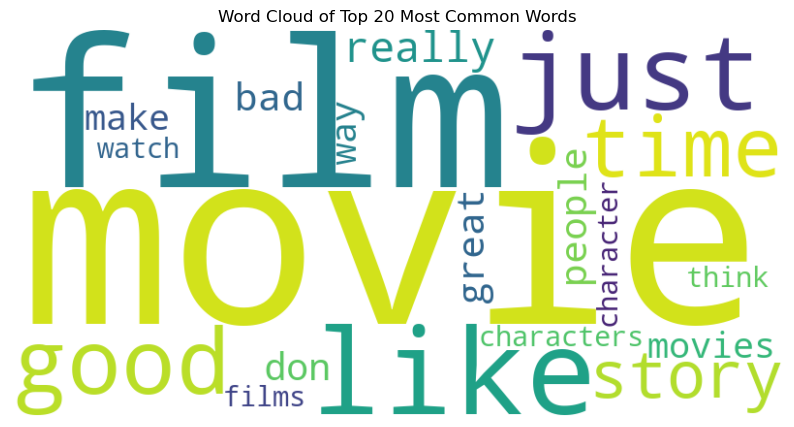

In [37]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

corpus = ' '.join(df['cleaned_review'])

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the vectorizer to the data
X = vectorizer.fit_transform(df['cleaned_review'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate word frequencies
word_frequencies = X.sum(axis=0)

# Create a dictionary mapping the words to their frequencies
word_frequency_dict = {word: word_frequencies[0, idx] for idx, word in enumerate(feature_names)}

# Sort words by frequency in descending order
sorted_word_frequencies = sorted(word_frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = sorted_word_frequencies[:20]  # Adjust the number as per your preference

# Visualize the results using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Visualize the results using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Top 20 Most Common Words')
plt.axis('off')
plt.show()


# **Step 7.	Text Classification:**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Sample text data and labels
texts = df['cleaned_review']
labels = df['sentiment']  # Target column

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
y = labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      7411
    positive       0.88      0.85      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000


Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.73      0.72      7411
    positive       0.73      0.72      0.72      7589

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



# **Step 8.	Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import dendrogram, linkage



# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit the number of features
X = vectorizer.fit_transform(df['cleaned_review'])

# Dimensionality Reduction for Visualization (using TruncatedSVD instead of PCA to handle sparse matrices)
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X.toarray())

# Silhouette Scores
kmeans_silhouette = silhouette_score(X, kmeans_labels)
agg_silhouette = silhouette_score(X, agg_labels)

print(f'K-means Silhouette Score: {kmeans_silhouette:.3f}')
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette:.3f}')

# Plotting Clusters
plt.figure(figsize=(14, 7))

# Plot K-Means Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Plot Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=agg_labels, palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()

# Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
Z = linkage(X.toarray(), 'ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


### Future Directions
While the current analysis provides valuable insights, several areas for future exploration could enhance the understanding and application of NLP techniques:

Expanding the Dataset:

Incorporating larger and more diverse datasets could improve the robustness and generalizability of the models. Datasets from different domains or with more varied text types can provide a broader context.
Advanced Text Embeddings:

Exploring more advanced text embeddings such as BERT or GPT could enhance the representation of text data. These embeddings capture contextual information more effectively and may improve model performance.
Fine-Tuning Models:

Further fine-tuning of the sentiment analysis and text classification models could lead to better performance. Techniques such as hyperparameter optimization and model ensembling may yield improvements.
Incorporating Domain-Specific Knowledge:

Integrating domain-specific knowledge and external resources (e.g., domain-specific lexicons) could enhance the relevance and accuracy of the analysis.
Exploring Other NLP Tasks:

Additional NLP tasks, such as summarization or translation, could be integrated into the analysis to provide a more comprehensive understanding of the text data.
Real-Time Analysis:

Implementing real-time text processing and analysis systems could provide immediate insights and applications, particularly useful in dynamic environments such as social media monitoring.
Improving Visualization Techniques:

Exploring advanced visualization techniques, including interactive plots and network visualizations, could offer more intuitive insights into the data and analysis results.
By addressing these future directions, the NLP models and analysis can be further refined and applied to more complex and varied text data, leading to deeper insights and more practical applications.